In [127]:
import numpy as np
import matplotlib.pyplot as plt

## 作业一

### 1. 使用循环的方式计算每天的采购总金额 得到结果为[37.2, 37.6, 36.8]，分别表示7/28、7/29、7/30这三天采购总额

In [128]:
X = np.array([[1.2, 1.5, 1.8],
 [1.3, 1.4, 1.9],
 [1.1, 1.6, 1.7]])
X

array([[1.2, 1.5, 1.8],
       [1.3, 1.4, 1.9],
       [1.1, 1.6, 1.7]])

In [129]:
y = np.array([5, 10, 9])
y

array([ 5, 10,  9])

In [130]:
W = np.zeros(shape=(3,3), dtype = float)
W

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [131]:
for i in range(0,3):
     W[i] = X[i] * y
W

array([[ 6. , 15. , 16.2],
       [ 6.5, 14. , 17.1],
       [ 5.5, 16. , 15.3]])

In [132]:
W.sum(axis = 1)

array([37.2, 37.6, 36.8])

### 2. 使用矩阵点乘来计算每天的采购总金额（使用np.dot来实现矩阵相乘）

In [133]:
np.dot(X,y)

array([37.2, 37.6, 36.8])

### 3. 测试两种方式的性能

In [134]:
import time

In [135]:
%time res = np.dot(X,y)

Wall time: 0 ns


In [136]:
%time res = W.sum(axis = 1)

Wall time: 0 ns


# 作业二

### 1.请将X处理为一个3列的矩阵

In [137]:
np.random.seed(1)
X = np.random.randint(1, 10, size = 30)
X

array([6, 9, 6, 1, 1, 2, 8, 7, 3, 5, 6, 3, 5, 3, 5, 8, 8, 2, 8, 1, 7, 8,
       7, 2, 1, 2, 9, 9, 4, 9])

In [138]:
data = X.reshape(10,3)
data

array([[6, 9, 6],
       [1, 1, 2],
       [8, 7, 3],
       [5, 6, 3],
       [5, 3, 5],
       [8, 8, 2],
       [8, 1, 7],
       [8, 7, 2],
       [1, 2, 9],
       [9, 4, 9]])

### 2.将第三列中，小于等于3的修改为0、大于3且小于等于6的修改为1、大于6的修改为2

In [139]:
import pandas as pd

In [140]:
df = pd.DataFrame(data)
df

,0,1,2
0,6,9,6
1,1,1,2
2,8,7,3
3,5,6,3
4,5,3,5
5,8,8,2
6,8,1,7
7,8,7,2
8,1,2,9
9,9,4,9


In [141]:
df1 = df[2]
df1

0    6
1    2
2    3
3    3
4    5
5    2
6    7
7    2
8    9
9    9
Name: 2, dtype: int32

In [142]:
for i in range(0,10):
    if df1[i] <= 3:
        df1[i] = 0
    elif df1[i] > 3 and df1[i] <= 6:
        df1[i] = 1
    elif df1[i] > 6:
        df1[i] = 2

In [143]:
df[2] = df1

In [144]:
df.values

array([[6, 9, 1],
       [1, 1, 0],
       [8, 7, 0],
       [5, 6, 0],
       [5, 3, 1],
       [8, 8, 0],
       [8, 1, 2],
       [8, 7, 0],
       [1, 2, 2],
       [9, 4, 2]])

###  3.假设这是10条样本数据，前两列是样本的两个特征，第3列是样本的分类标记，请分离出样本的特征和分类 标记，分别存放在两个变量中，用 X_train 存放样本特征(红色部份), y_train存放分类标记(绿色部份) 

In [145]:
X_train = df.values[::,:2]
X_train

array([[6, 9],
       [1, 1],
       [8, 7],
       [5, 6],
       [5, 3],
       [8, 8],
       [8, 1],
       [8, 7],
       [1, 2],
       [9, 4]])

In [146]:
y_train = df.values[::,2:3]
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2]])

### 4.请用 numpy 的比较运算，通过 y_train 中的数据，分离出 X_train 中的 3 个分类

In [147]:
df3 = df[df[2]==0]
df3

,0,1,2
1,1,1,0
2,8,7,0
3,5,6,0
5,8,8,0
7,8,7,0


In [148]:
# 分离为0的样本
df3[[0,1]].values

array([[1, 1],
       [8, 7],
       [5, 6],
       [8, 8],
       [8, 7]])

In [149]:
df4 = df[df[2]==1]
df4

,0,1,2
0,6,9,1
4,5,3,1


In [150]:
#分类为1的样本
df4[[0,1]].values

array([[6, 9],
       [5, 3]])

In [151]:
df5 = df[df[2]==2]
df5

,0,1,2
6,8,1,2
8,1,2,2
9,9,4,2


In [152]:
df5[[0,1]].values

array([[8, 1],
       [1, 2],
       [9, 4]])

## 作业三
### 服务器日志数据分析

### 1. 请将数据导入pandas中，加上列名

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [154]:
df = pd.read_table('./test/log.txt', header = None, sep = '\t',
    names = ['id', 'api', 'count', 'res_time_sum', 'res_time_min', 'res_time_max', 'res_time_avg', 'interval', 'created_at'])
df.head()

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
0,2019162542,/front-api/bill/create,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
1,162644,/front-api/bill/create,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2,162742,/front-api/bill/create,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
3,162808,/front-api/bill/create,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
4,162943,/front-api/bill/create,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07


In [155]:
df.sample(5)

,id,api,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
153843,11466400,/front-api/bill/create,9,1603.03,81.63,539.04,178.0,60,2019-05-01 21:50:49
88713,6748463,/front-api/bill/create,8,1321.85,75.93,392.42,165.0,60,2019-02-12 18:26:08
173406,12963962,/front-api/bill/create,3,287.30,77.78,121.28,95.0,60,2019-05-24 01:32:14
26286,2512270,/front-api/bill/create,4,587.17,96.66,184.09,146.0,60,2018-12-01 17:16:09
114637,8482643,/front-api/bill/create,7,1249.51,73.80,482.81,178.0,60,2019-03-17 23:06:02


## 2. 检测是否有重复值

In [156]:
df['created_at'].describe()

count                  179496
unique                 179496
top       2018-11-18 00:33:40
freq                        1
Name: created_at, dtype: object

In [157]:
df['api'].describe()

count                     179496
unique                         1
top       /front-api/bill/create
freq                      179496
Name: api, dtype: object

In [158]:
df.interval.unique()

array([60], dtype=int64)

In [159]:
df['api'].describe()
df = df.drop('api', axis = 1)
df.head(5)
df.describe()
# 检测这些数据并无异常

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval
count,1.794960e+05,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000,179496.0
mean,6.877739e+06,7.175909,1393.177832,108.419626,359.880374,187.812208,60.0
std,6.012494e+06,4.325160,1499.486073,79.640693,638.919827,224.464813,0.0
min,1.626440e+05,1.000000,36.550000,3.210000,36.550000,36.000000,60.0
25%,3.825233e+06,4.000000,607.707500,83.410000,198.280000,144.000000,60.0
50%,6.811510e+06,7.000000,1154.905000,97.120000,256.090000,167.000000,60.0
75%,9.981455e+06,10.000000,1834.117500,116.990000,374.410000,202.000000,60.0
max,2.019163e+09,31.000000,142650.550000,18896.640000,142468.270000,71325.000000,60.0


In [160]:
df[(df.created_at >= '2019-05-01') & (df.created_at < '2019-05-02')]

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
153089,11406128,6,2105.08,125.74,992.46,350.0,60,2019-05-01 00:00:48
153090,11406236,7,2579.11,76.55,987.47,368.0,60,2019-05-01 00:01:48
153091,11406347,7,1277.79,109.65,236.73,182.0,60,2019-05-01 00:02:48
153092,11406446,7,2137.20,131.55,920.52,305.0,60,2019-05-01 00:03:48
153093,11406488,13,2948.70,86.42,491.31,226.0,60,2019-05-01 00:04:48
...,...,...,...,...,...,...,...,...
153968,11475363,6,1083.97,70.85,262.22,180.0,60,2019-05-01 23:55:49
153969,11475483,4,840.00,117.31,382.63,210.0,60,2019-05-01 23:56:49
153970,11475550,2,295.51,101.71,193.80,147.0,60,2019-05-01 23:57:49
153971,11475597,2,431.99,84.43,347.56,215.0,60,2019-05-01 23:58:49


## 4. 分析api和interval这两列的数据是否对分析有用，如果无用，说明为什么后将这两列丢弃

### 答：这两列数据对分析作用不大，因为API接口的链接基本上都是同一个接口的url，interval也是显示时间间隔是60秒，从created_at这里列就可以获得了

## 5. 使用created_at这一列的数据作为时间索引

In [161]:
df.index = df['created_at']
df

,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,
2018-11-01 00:00:07,2019162542,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
2018-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2018-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
2018-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
2018-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07
...,...,...,...,...,...,...,...,...
2019-05-30 23:06:21,13438800,11,2783.48,99.24,489.90,253.0,60,2019-05-30 23:06:21
2019-05-30 23:07:21,13438866,10,1951.10,85.37,529.51,195.0,60,2019-05-30 23:07:21
2019-05-30 23:08:21,13438917,3,494.17,103.95,211.47,164.0,60,2019-05-30 23:08:21


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179496 entries, 2018-11-01 00:00:07 to 2019-05-30 23:10:21
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            179496 non-null  int64  
 1   count         179496 non-null  int64  
 2   res_time_sum  179496 non-null  float64
 3   res_time_min  179496 non-null  float64
 4   res_time_max  179496 non-null  float64
 5   res_time_avg  179496 non-null  float64
 6   interval      179496 non-null  int64  
 7   created_at    179496 non-null  object 
dtypes: float64(4), int64(3), object(1)
memory usage: 12.3+ MB


In [163]:
df.index = pd.to_datetime(df.created_at)

In [164]:
#转变为日期类型从新赋值
df.index

DatetimeIndex(['2018-11-01 00:00:07', '2018-11-01 00:01:07',
               '2018-11-01 00:02:07', '2018-11-01 00:03:07',
               '2018-11-01 00:04:07', '2018-11-01 00:05:07',
               '2018-11-01 00:06:07', '2018-11-01 00:07:07',
               '2018-11-01 00:08:07', '2018-11-01 00:09:07',
               ...
               '2019-05-30 23:01:21', '2019-05-30 23:02:21',
               '2019-05-30 23:03:21', '2019-05-30 23:04:21',
               '2019-05-30 23:05:21', '2019-05-30 23:06:21',
               '2019-05-30 23:07:21', '2019-05-30 23:08:21',
               '2019-05-30 23:09:21', '2019-05-30 23:10:21'],
              dtype='datetime64[ns]', name='created_at', length=179496, freq=None)

In [165]:
df['2018-11-01']

<ipython-input-165-2429d7ad8186>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018-11-01']


,id,count,res_time_sum,res_time_min,res_time_max,res_time_avg,interval,created_at
created_at,,,,,,,,
2018-11-01 00:00:07,2019162542,8,1057.31,88.75,177.72,132.0,60,2018-11-01 00:00:07
2018-11-01 00:01:07,162644,5,749.12,103.79,240.38,149.0,60,2018-11-01 00:01:07
2018-11-01 00:02:07,162742,5,845.84,136.31,225.73,169.0,60,2018-11-01 00:02:07
2018-11-01 00:03:07,162808,9,1305.52,90.12,196.61,145.0,60,2018-11-01 00:03:07
2018-11-01 00:04:07,162943,3,568.89,138.45,232.02,189.0,60,2018-11-01 00:04:07
...,...,...,...,...,...,...,...,...
2018-11-01 23:55:09,244364,4,594.19,117.33,229.29,148.0,60,2018-11-01 23:55:09
2018-11-01 23:56:09,244443,6,1061.85,132.71,221.12,176.0,60,2018-11-01 23:56:09
2018-11-01 23:57:09,244507,7,1191.49,104.12,215.48,170.0,60,2018-11-01 23:57:09


In [166]:
df = df.drop(['id', 'interval'], axis = 1)
df

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2018-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2018-11-01 00:00:07
2018-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2018-11-01 00:01:07
2018-11-01 00:02:07,5,845.84,136.31,225.73,169.0,2018-11-01 00:02:07
2018-11-01 00:03:07,9,1305.52,90.12,196.61,145.0,2018-11-01 00:03:07
2018-11-01 00:04:07,3,568.89,138.45,232.02,189.0,2018-11-01 00:04:07
...,...,...,...,...,...,...
2019-05-30 23:06:21,11,2783.48,99.24,489.90,253.0,2019-05-30 23:06:21
2019-05-30 23:07:21,10,1951.10,85.37,529.51,195.0,2019-05-30 23:07:21
2019-05-30 23:08:21,3,494.17,103.95,211.47,164.0,2019-05-30 23:08:21


In [167]:
df.describe()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg
count,179496.000000,179496.000000,179496.000000,179496.000000,179496.000000
mean,7.175909,1393.177832,108.419626,359.880374,187.812208
std,4.325160,1499.486073,79.640693,638.919827,224.464813
min,1.000000,36.550000,3.210000,36.550000,36.000000
25%,4.000000,607.707500,83.410000,198.280000,144.000000
50%,7.000000,1154.905000,97.120000,256.090000,167.000000
75%,10.000000,1834.117500,116.990000,374.410000,202.000000
max,31.000000,142650.550000,18896.640000,142468.270000,71325.000000


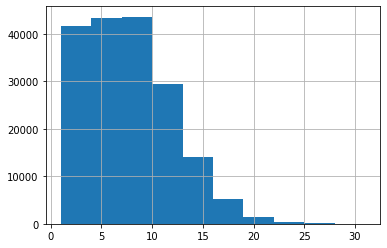

In [168]:
# 初步分析count直方图
df['count'].hist()
plt.show()
#接口调用次数大部分在10次以内,反应了每分钟访问的次数分布情况

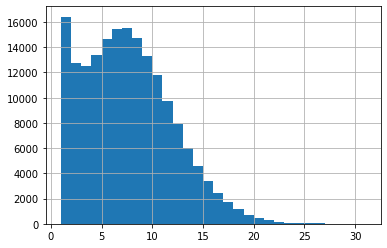

In [169]:
df['count'].hist(bins = 30)
plt.show()

## 6. 分析api调用次数情况，例如，在一天中，哪些时间是访问高峰，哪些时间段访问比较

<ipython-input-170-aef662f337e8>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-05-01']['count'].plot()


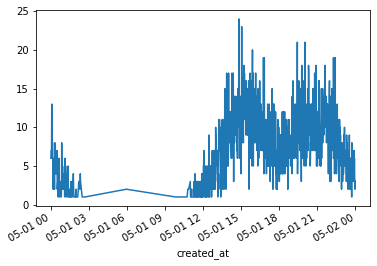

In [170]:
# 切出一天的数据，绘制出一天接口的调用情况
df['2019-05-01']['count'].plot()
plt.show()

### 从凌晨2点到11点访问少，业务高峰出在现下午两三点，晚上八九点

In [177]:
# 用count重采样，用一个小时进行采样，没那么多数据点，图像比较平滑
df2 = df['2019-5-1']

<ipython-input-177-07f42edf7712>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2 = df['2019-5-1']


In [181]:
df2 = df2[['count']].resample('1H').mean()
df2

,count
created_at,
2019-05-01 00:00:00,4.428571
2019-05-01 01:00:00,2.272727
2019-05-01 02:00:00,1.833333
2019-05-01 03:00:00,NaN
2019-05-01 04:00:00,NaN
2019-05-01 05:00:00,2.000000
2019-05-01 06:00:00,NaN
2019-05-01 07:00:00,NaN
2019-05-01 08:00:00,NaN


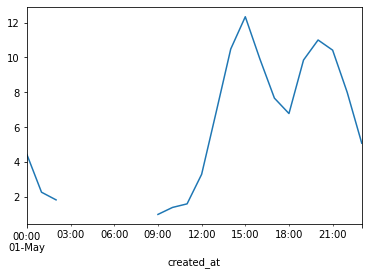

In [182]:
df2['count'].plot()
plt.show()

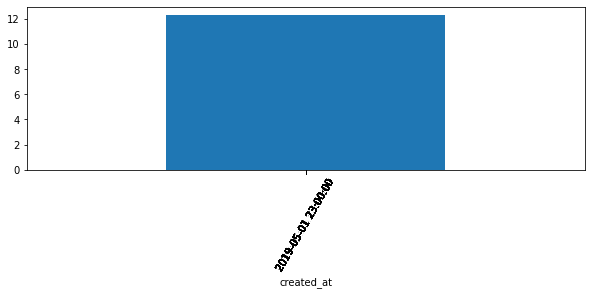

In [183]:
# 折线图和直方图，可以看到业务的高峰时段在什么地方，分不清具体时间，绘制柱状图
plt.figure(figsize = (10, 3))
df2['count'].plot(kind = 'bar')
plt.xticks(rotation=60) 
plt.show()

## 3. 检测是否有异常值

<ipython-input-196-1fa0b0f39d1e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1'][['count']].boxplot(showmeans = True,meanline = True)
<ipython-input-196-1fa0b0f39d1e>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1'][['res_time_avg']].boxplot()


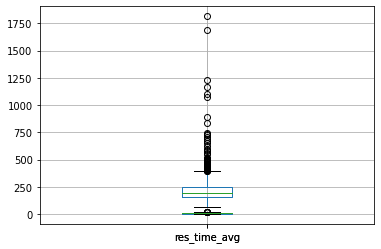

In [196]:
df['2019-5-1'][['count']].boxplot(showmeans = True,meanline = True)
plt.show()

In [200]:
df2 = df['2019-5-1']
df2[df['res_time_avg'] > 1000]

<ipython-input-200-c97d2191c92e>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df2 = df['2019-5-1']
<ipython-input-200-c97d2191c92e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df['res_time_avg'] > 1000]


,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2019-05-01 00:34:48,1,1694.47,1694.47,1694.47,1694.0,2019-05-01 00:34:48
2019-05-01 14:00:49,17,19770.18,207.54,2974.52,1162.0,2019-05-01 14:00:49
2019-05-01 18:36:49,8,8799.92,96.59,3233.26,1099.0,2019-05-01 18:36:49
2019-05-01 19:09:49,6,7399.94,307.39,3153.02,1233.0,2019-05-01 19:09:49
2019-05-01 19:10:49,13,23595.60,206.20,4664.84,1815.0,2019-05-01 19:10:49
2019-05-01 20:38:49,15,16169.25,142.47,3624.26,1077.0,2019-05-01 20:38:49


<ipython-input-198-c4028149f2c3>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1'][['res_time_avg']].boxplot()


<AxesSubplot:>

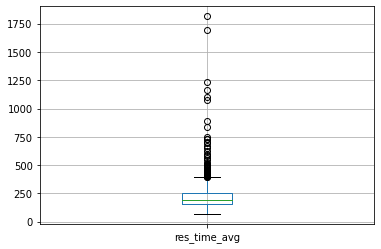

In [198]:
#异常值
df['2019-5-1'][['res_time_avg']].boxplot()

In [188]:
df[df['count'] > 20 ]

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at
created_at,,,,,,
2018-11-01 20:47:09,21,3117.20,84.90,260.82,148.0,2018-11-01 20:47:09
2018-11-01 21:03:09,21,3706.20,78.12,321.47,176.0,2018-11-01 21:03:09
2018-11-01 21:13:09,24,4602.03,76.31,391.12,191.0,2018-11-01 21:13:09
2018-11-02 21:34:11,30,4610.15,72.49,463.41,153.0,2018-11-02 21:34:11
2018-11-03 14:20:13,21,3113.93,74.29,266.20,148.0,2018-11-03 14:20:13
...,...,...,...,...,...,...
2019-05-30 21:33:21,27,6456.64,99.65,978.91,239.0,2019-05-30 21:33:21
2019-05-30 21:43:21,21,6371.84,65.98,1175.37,303.0,2019-05-30 21:43:21
2019-05-30 21:47:21,21,3992.83,87.83,440.88,190.0,2019-05-30 21:47:21


<ipython-input-189-8267e704a774>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1']['res_time_avg'].plot()


<AxesSubplot:xlabel='created_at'>

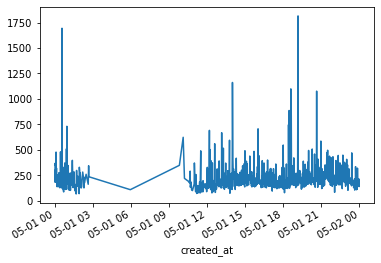

In [189]:
df['2019-5-1']['res_time_avg'].plot()

<ipython-input-194-0a361db85e01>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1'][['res_time_avg']].boxplot()


<AxesSubplot:>

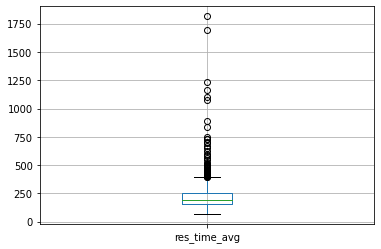

In [194]:
df['2019-5-1'][['res_time_avg']].boxplot()

<ipython-input-201-86552e8eb6c0>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-1'][['res_time_sum', 'res_time_min','res_time_max','res_time_avg']].plot()


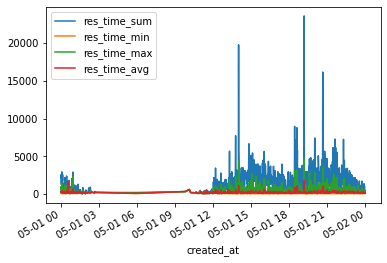

In [201]:
df['2019-5-1'][['res_time_sum', 'res_time_min','res_time_max','res_time_avg']].plot()
plt.show()

## 7. 分析一天中api响应时间

<ipython-input-202-fcd934f90cdd>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data = df['2019-5-1'].resample('20T').mean()


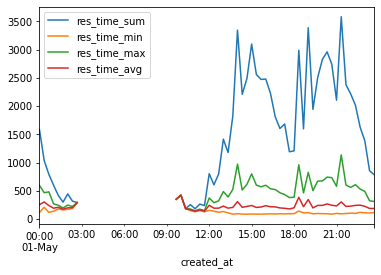

In [202]:
data = df['2019-5-1'].resample('20T').mean()
data[['res_time_sum', 'res_time_min','res_time_max','res_time_avg']].plot()
plt.show()

## 8. 分析连续的几天数据，可以发现，每天的业务高峰时段都比较相似

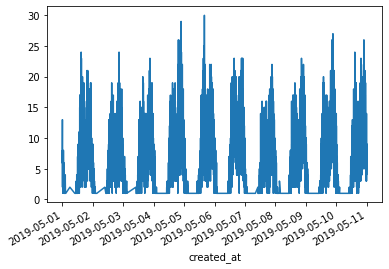

In [203]:
df['2019-5-1' :  '2019-5-10']['count'].plot()
plt.show()

## 9. 分析周末访问量是否有增加

In [204]:
df['2019-5-2'].index.weekday # 0 代表星期一  1代表星期2

<ipython-input-204-375cd9e85cf7>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2019-5-2'].index.weekday # 0 代表星期一  1代表星期2


Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
           dtype='int64', name='created_at', length=865)

In [205]:
df['weekday'] = df.index.weekday

In [207]:
df.head(2)

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday
created_at,,,,,,,
2018-11-01 00:00:07,8,1057.31,88.75,177.72,132.0,2018-11-01 00:00:07,3
2018-11-01 00:01:07,5,749.12,103.79,240.38,149.0,2018-11-01 00:01:07,3


In [211]:
df['weekend'] = df['weekday'].isin({5,6})

In [212]:
df.tail()

,count,res_time_sum,res_time_min,res_time_max,res_time_avg,created_at,weekday,weekend
created_at,,,,,,,,
2019-05-30 23:06:21,11,2783.48,99.24,489.90,253.0,2019-05-30 23:06:21,3,False
2019-05-30 23:07:21,10,1951.10,85.37,529.51,195.0,2019-05-30 23:07:21,3,False
2019-05-30 23:08:21,3,494.17,103.95,211.47,164.0,2019-05-30 23:08:21,3,False
2019-05-30 23:09:21,9,1798.28,101.11,433.30,199.0,2019-05-30 23:09:21,3,False
2019-05-30 23:10:21,6,1017.97,74.45,298.97,169.0,2019-05-30 23:10:21,3,False


In [213]:
# 对weekend 进行分组。对count列求平均值
df.groupby('weekend')['count'].mean()

weekend
False    7.016846
True     7.574989
Name: count, dtype: float64

In [220]:
# 周末哪个时段调用次数比较高
df.groupby(['weekend', df.index.hour])['count'].mean()

weekend  created_at
False    0              3.239120
         1              1.668388
         2              1.162551
         3              1.086705
         4              1.155556
         5              1.136364
         6              1.000000
         7              1.000000
         8              1.000000
         9              1.080000
         10             1.239011
         11             2.031690
         12             4.195845
         13             6.668042
         14             8.260503
         15             8.934448
         16             8.466504
         17             6.784996
         18             6.717731
         19             8.655913
         20            10.536496
         21            10.846906
         22             9.034164
         23             5.946834
True     0              3.467782
         1              1.741849
         2              1.161826
         3              1.050000
         4              1.076923
         5             

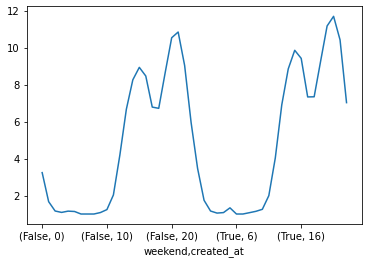

In [221]:
df.groupby(['weekend', df.index.hour])['count'].mean().plot()
plt.show()

In [223]:
df.groupby(['weekend', df.index.hour])['count'].mean().unstack(level = 0)

weekend,False,True
created_at,,
0,3.239120,3.467782
1,1.668388,1.741849
2,1.162551,1.161826
3,1.086705,1.050000
4,1.155556,1.076923
5,1.136364,1.333333
6,1.000000,1.000000
7,1.000000,1.000000
8,1.000000,1.071429


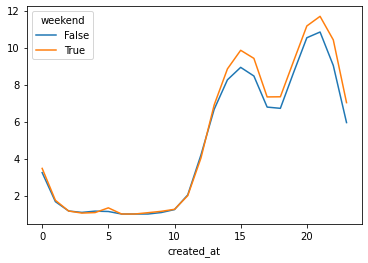

In [224]:
df.groupby(['weekend', df.index.hour])['count'].mean().unstack(level = 0).plot()
plt.show()